# Phân tích dữ liệu chất lượng rượu đỏ 

## MỤC TIÊU VÀ KHÁI QUÁT BỘ DỮ LIỆU

### Mục tiêu phân tích: 
Bài thực hành nhằm khám phá toàn diện tập dữ liệu về rượu đỏ với 1.599 mẫu và 12 thuộc tính hóa học để xác định các yếu tố then chốt ảnh hưởng đến chất lượng. Mục tiêu cụ thể bao gồm: phân tích thống kê mô tả các chỉ số hóa học (độ acid, nồng độ cồn, pH, sulfur dioxide, đường sót lại), khám phá mối quan hệ giữa các biến, và xác định thành phần nào tác động mạnh nhất đến điểm chất lượng từ 3-8. Qua đó giúp hiểu rõ profile hóa học lý tưởng cho rượu đỏ chất lượng cao.

### Bộ dữ liệu: 
Tập dữ liệu bao gồm 11 thuộc tính đầu vào là các chỉ số hóa học quan trọng: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates và alcohol. Biến mục tiêu quality đánh giá chất lượng cảm quan trên thang điểm 3-8. Dữ liệu này cho phép phân tích mối tương quan giữa thành phần hóa học và chất lượng thực tế, từ đó rút ra insights có giá trị cho quá trình sản xuất và kiểm soát chất lượng rượu.

### Import thư viện và đọc dữ liệu từ file csv

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("winequality-red.csv")

In [21]:
df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

### Kiểm tra dữ liệu 

In [22]:
print(f"Số dòng: {df.shape[0]}")
print(f"Số cột: {df.shape[1]}")

print(df.dtypes)

df.info()

print("\n=== GIÁ TRỊ THIẾU ===")
missing_values = df.isnull().sum()
print(missing_values)

print("\n=== TỔNG SỐ GIÁ TRỊ THIẾU ===")
print(f"Tổng giá trị thiếu: {df.isnull().sum().sum()}")

Số dòng: 1599
Số cột: 12
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   densit

### Thống kê mô tả

In [23]:
print("\n=== THỐNG KÊ MÔ TẢ ===")
print(df.describe())


=== THỐNG KÊ MÔ TẢ ===
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000      

### Vẽ biểu đồ phân phối và tương quan (Histogram, Boxplot, Heatmap)

/var/folders/76/7qnq78756db096lybc5jxpsm0000gn/T/ipykernel_2997/2217332188.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='pastel', edgecolor='black')


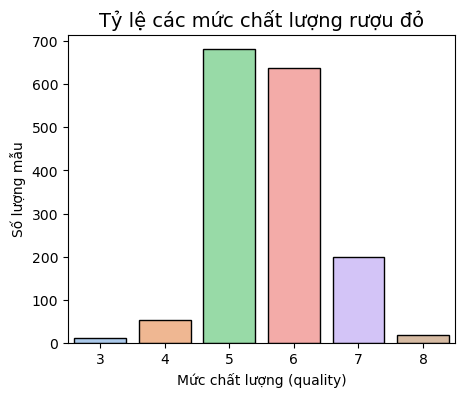

In [19]:
plt.figure(figsize=(5, 4))
sns.countplot(x='quality', data=df, palette='pastel', edgecolor='black')
plt.title('Tỷ lệ các mức chất lượng rượu đỏ', fontsize=14)
plt.xlabel('Mức chất lượng (quality)')
plt.ylabel('Số lượng mẫu')
plt.show()

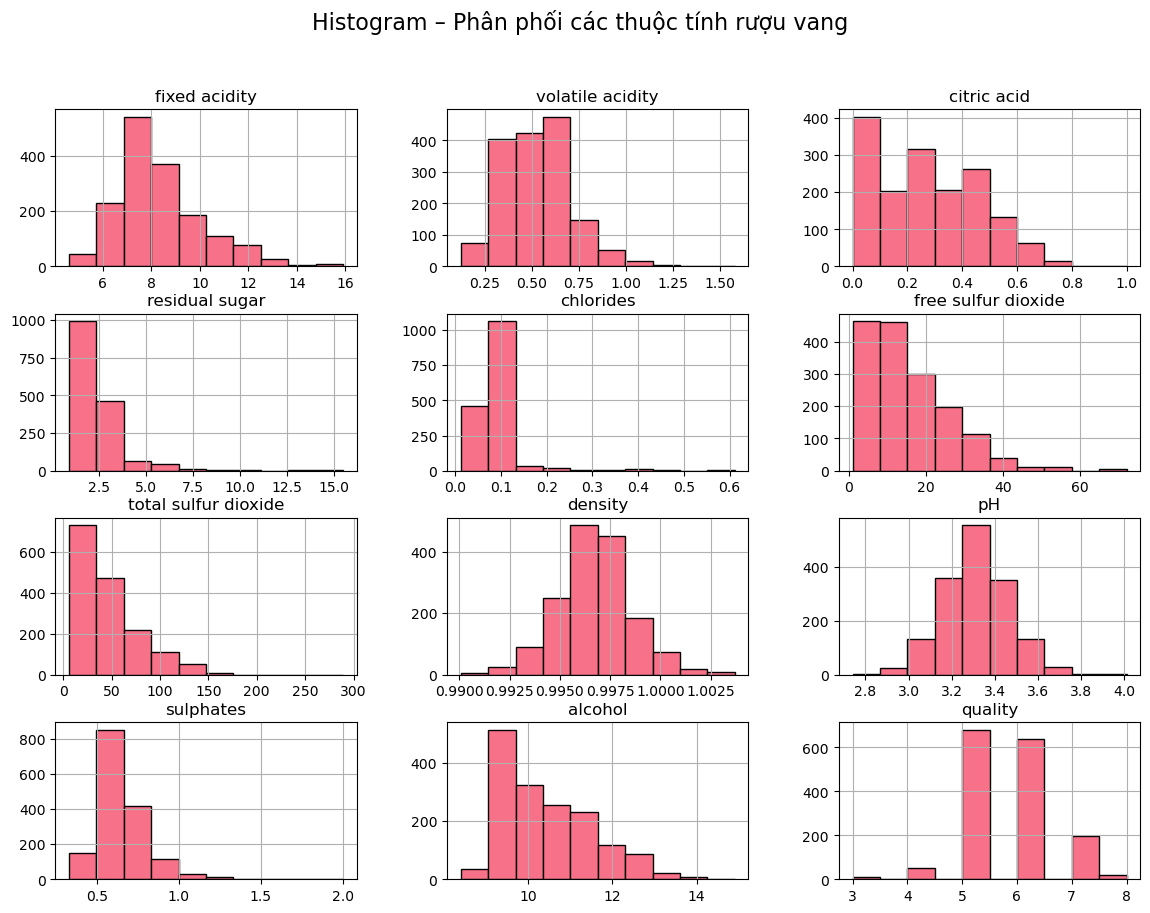

In [15]:
df.hist(figsize=(14, 10), bins=10, edgecolor='black')
plt.suptitle('Histogram – Phân phối các thuộc tính rượu vang', fontsize=16)
plt.show()

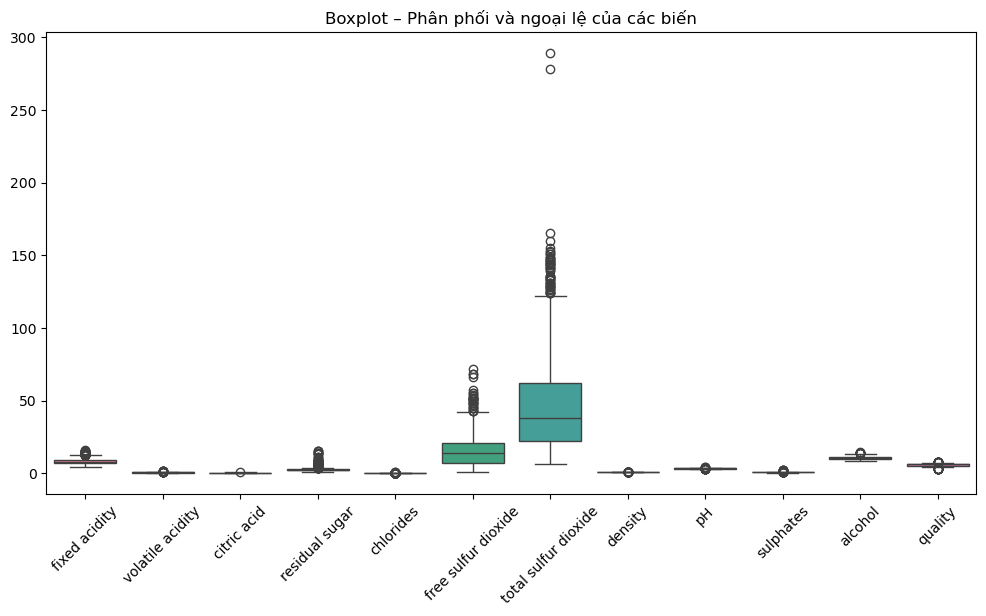

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Boxplot – Phân phối và ngoại lệ của các biến')
plt.xticks(rotation=45)
plt.show()


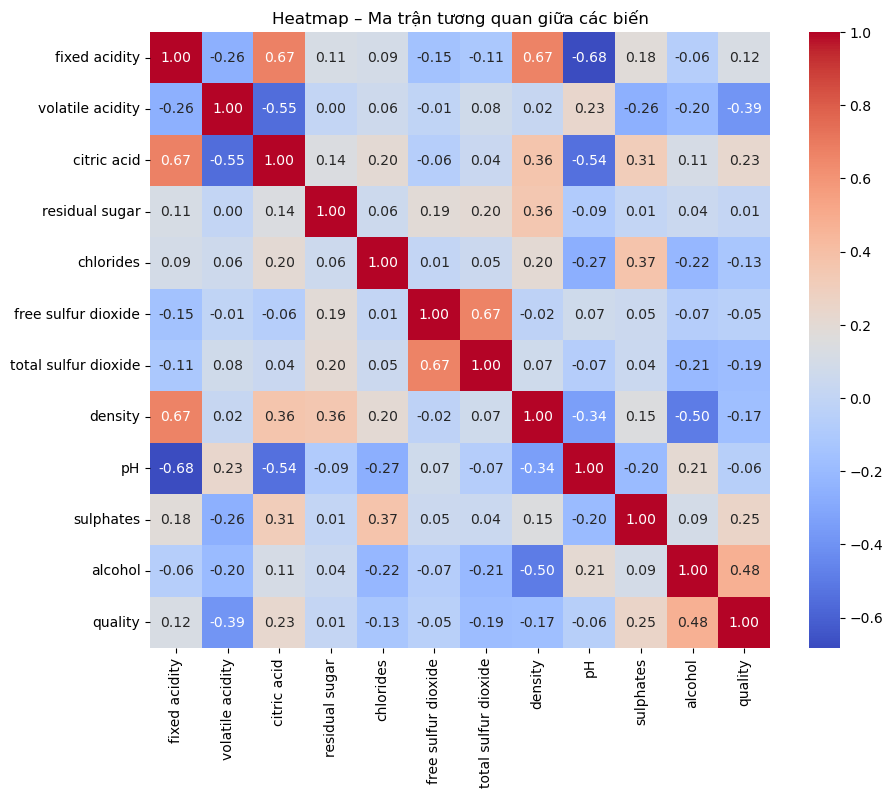

In [17]:
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap – Ma trận tương quan giữa các biến')
plt.show()